## 8.k近傍法

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 前処理

データを読み込みます。（ここではKNN.csvというcsvを読み込んでいます。）

In [ ]:
#データの読み込み
anime = pd.read_csv("knn.csv",index_col=0)
anime

,Space,Battle,Friendship,Magic,Group
0,5,7,1,1,0
1,5,6,4,1,0
2,9,10,1,0,0
3,14,9,3,1,0
4,10,7,1,1,0
...,...,...,...,...,...
276,18,6,5,4,2
277,21,6,11,13,1
278,7,9,11,5,2
279,21,3,15,9,2


In [ ]:
X = anime.drop(['Group'], axis=1).values   # 説明変数
Y = anime['Group'].values   # 目的変数

学習データとテストデータを7:3で分割します。

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

### k近傍法の実装

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
# 予測実行
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0])

予測精度を確認します。

In [ ]:
from sklearn import metrics

metrics.accuracy_score(Y_test, y_pred)

0.6588235294117647

kの値によって予測精度が変わるので、kを変化させながら予測精度を出力するグラフを参考までに作成します。

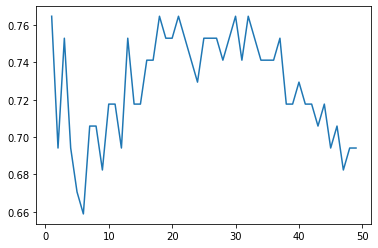

In [ ]:
k_range = []
accuracy = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成
    knn.fit(X_train, Y_train)                 # モデル作成実行
    y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(Y_test, y_pred)) # 精度格納
    k_range.append(k)

plt.plot(k_range, accuracy)

### 分類結果の可視化

In [ ]:
test_df = pd.DataFrame(
    X_test,
   # columns = anime
)

test_df["Group"] = Y_test
test_df["pred_Group"] = y_pred

test_df.head()

,0,1,2,3,Group,pred_Group
0,6,6,14,7,1,2
1,7,6,17,13,2,2
2,17,5,7,6,1,1
3,5,3,3,0,0,0
4,16,7,2,1,0,0


まずは正解ラベルで色付けした可視化です。

Text(0.5, 1.0, 'true Group')

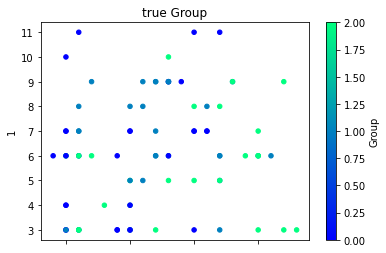

In [ ]:
test_df.plot(kind="scatter", x=0, y=1, c="Group", cmap="winter")
plt.title("true Group")

続いて、予測ラベルで色付けした可視化です。

Text(0.5, 1.0, 'prediction Group')

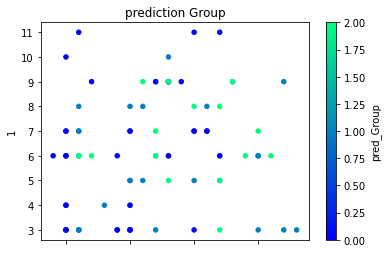

In [ ]:
test_df.plot(kind="scatter", x=0, y=1, c="pred_Group", cmap="winter")
plt.title("prediction Group")